In [1]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
print("imported!")

imported!


In [2]:
file = pd.read_csv("../datasets/heart.csv")

file

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
from sklearn.ensemble import RandomForestClassifier

# creating a seed
np.random.seed(42)

# vertical split
x = file.drop("target",axis=1)
y = file["target"]

# horizontal split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# model importing and fitting.
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)


RandomForestClassifier()

In [4]:
# score for 1.0 test on training data
model.score(x_train,y_train)

1.0

In [5]:
# actual score
model.score(x_test,y_test)

0.8524590163934426

# now evaluaion

now for evaluation we have 3 techniques
* Using the `model.score(x_test,y_test)` method, this method is already being used above, we just make the machine learning model learn the features with its corresponding labels. finds the pattern and tests the x_test data.
* Now second method  -  Using Cross-Validation method- Cross validation is a technique used to check the score of model or performance of the model using various testing data.
In this method we use a technique called as **k-fold** method, In this the model is trained again and again on different testing data, basically the same dataset is divided into say k folds and each fold represents a testing data, for every iteration the kth index is taken as testing data and is tested against all the other non kth training data. the final score is evaluated which marks the array of scores for the kth index

here is the visaulization:

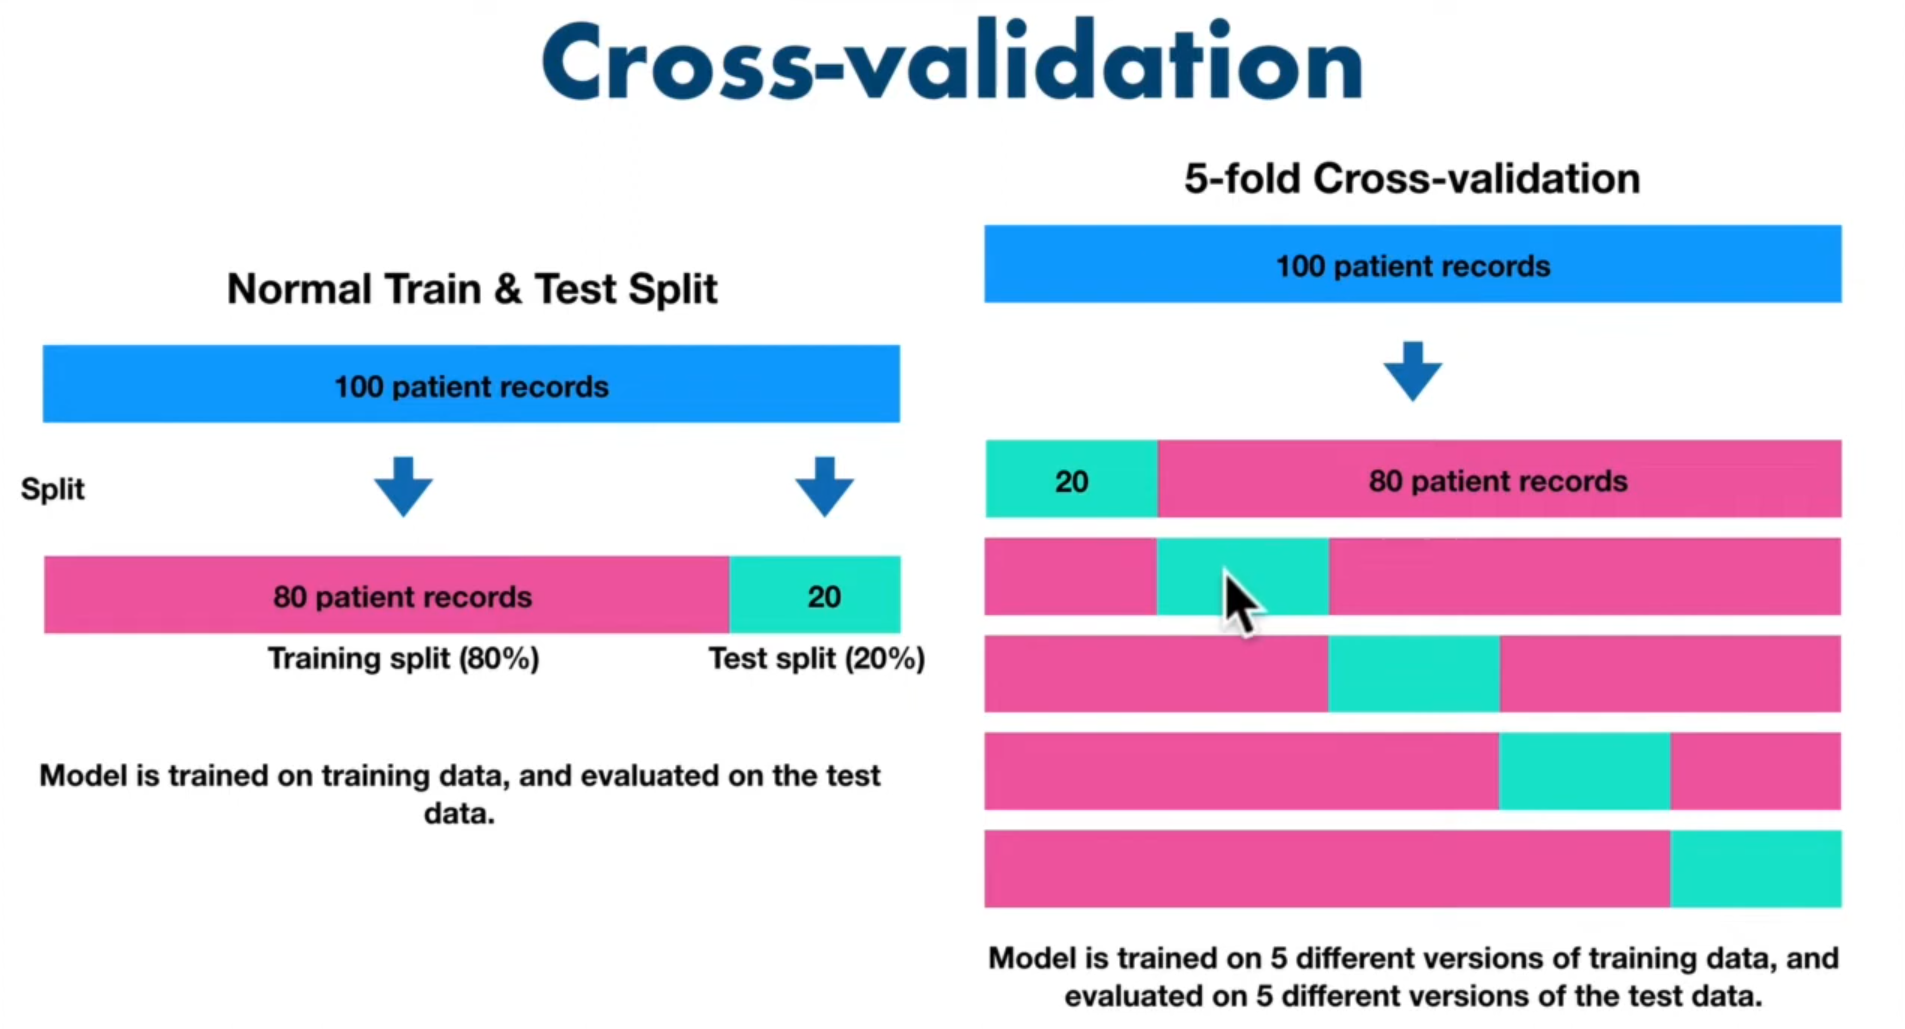

In [6]:
# cross validation in action 
from sklearn.model_selection import cross_val_score

cross_val_score(model, x,y,cv = 5)
# cross validation -> (model we are using(model), features set(x), labels set(y), number of folds(cv='k'))

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [7]:
np.random.seed(42)

# compare

model.score(x_test,y_test), np.mean(cross_val_score(model,x,y,cv=5))

(0.8524590163934426, 0.8248087431693989)

even though if cross validation score is less than `model.score(x_test,y_test)` we should consider cross validation score only, as it is more trusted and tested on various data.

#### Area Under Curve

* ##### (AUC)- Area Under Curve
* ##### (ROC)- Receiver operating characterstic curve

**ROC**- ROC are the comparison between true positive rate(TPR) versus model's false positive rate(FPR).

* True positive - when model predicts true(1) and actual value is true(1).
* False positive - When model predicts true(1) but actual value is false(0).
* True Negative- When model predicts False(0) and actual value is also false(0).
* False negative- When model predicts True(0) but actual value is false(1).


In [8]:
# assessing the matrix in the form of the index
y_probability = model.predict_proba(x_test)
y_probability[:10], len(y_probability)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [9]:
y_probability_postives = y_probability[: , 1]

In [10]:
y_probability_postives[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

Calculate fpr, tpr, threshold

In [11]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_probability_postives)

In [12]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [13]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [14]:
thresholds

array([ inf, 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

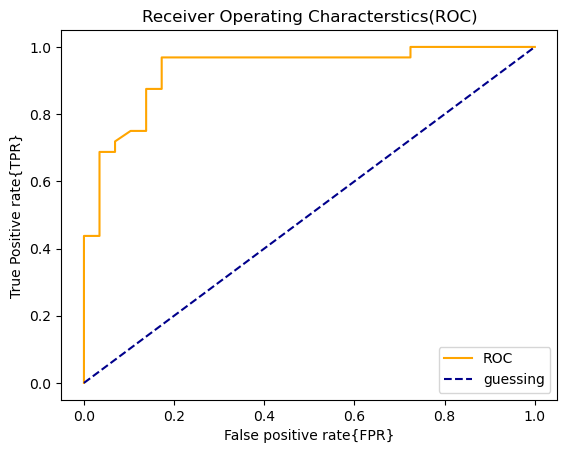

In [15]:
def plot_roc_curve(fpr,tpr):
    """
    we are plotting the roc curve for x-label as fpr and y-label as tpr
    """
    # plotting the curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plotting a baseline for predcition
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    # customize the plot
    plt.xlabel("False positive rate{FPR}")
    plt.ylabel("True Positive rate{TPR}")
    plt.title("Receiver Operating Characterstics(ROC)")
    plt.legend()
    plt.show();

plot_roc_curve(fpr,tpr)

### AOC curve



In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probability_postives)

0.9304956896551724

In [17]:
# perfect ROC curve

tpr,fpr,thresholds = roc_curve(y_test,y_test)

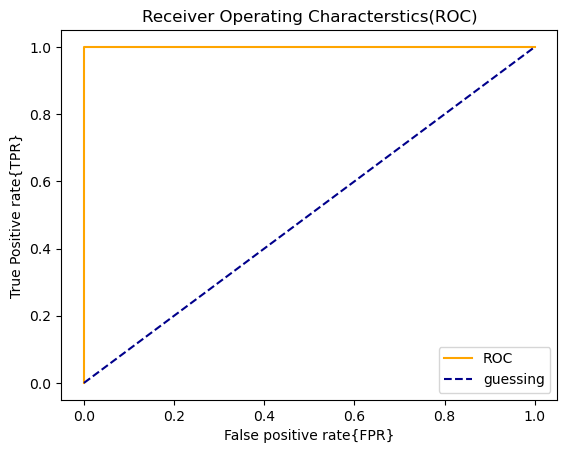

In [18]:
plot_roc_curve(tpr,fpr)

In [19]:
# perfect are under the curve

roc_auc_score(y_test,y_test)

1.0

## Confusion matrix

confusion matrix gives where the model is going wrong, it gives a 2 x 2 matrix with true positives(tpr) and true negative in the primary diagonal which counts to the accuracy of the model the other non- primary diagonal is where the model is confused to take the decision.


In [20]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [21]:
# making it more visualizable.
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["Predicted label"])

Predicted label,0,1
Actual labels,,
0,24,5
1,4,28


**Useful notation from this confusion matrix.**

here:
* 28 is the TRUE POSITIVE - comes under the predicted label 1 and actual label 1.
* 24 is TRUE NEGATIVE - comes under the predicted label 0 and actual label 0.
* 5 is FALSE POSITIVE - comes under the predicted label 1 and actual label 0.
* 4 is FALSE NEGATIVE - comes under the predicted label 0 and actual label 1.
* NOTE- The accuracy is considered by looking at the TRUE POSITIVES AND TRUE NEGATIVES ONLY, it measures how many times the model gives the answer matching the actual value.
  


In [22]:
(28 + 24 + 5 + 4)==len(x_test)

True

visualisation using seaborn- but seaborn is not present in the env folder- install it using the 

1. miniconda terminal
   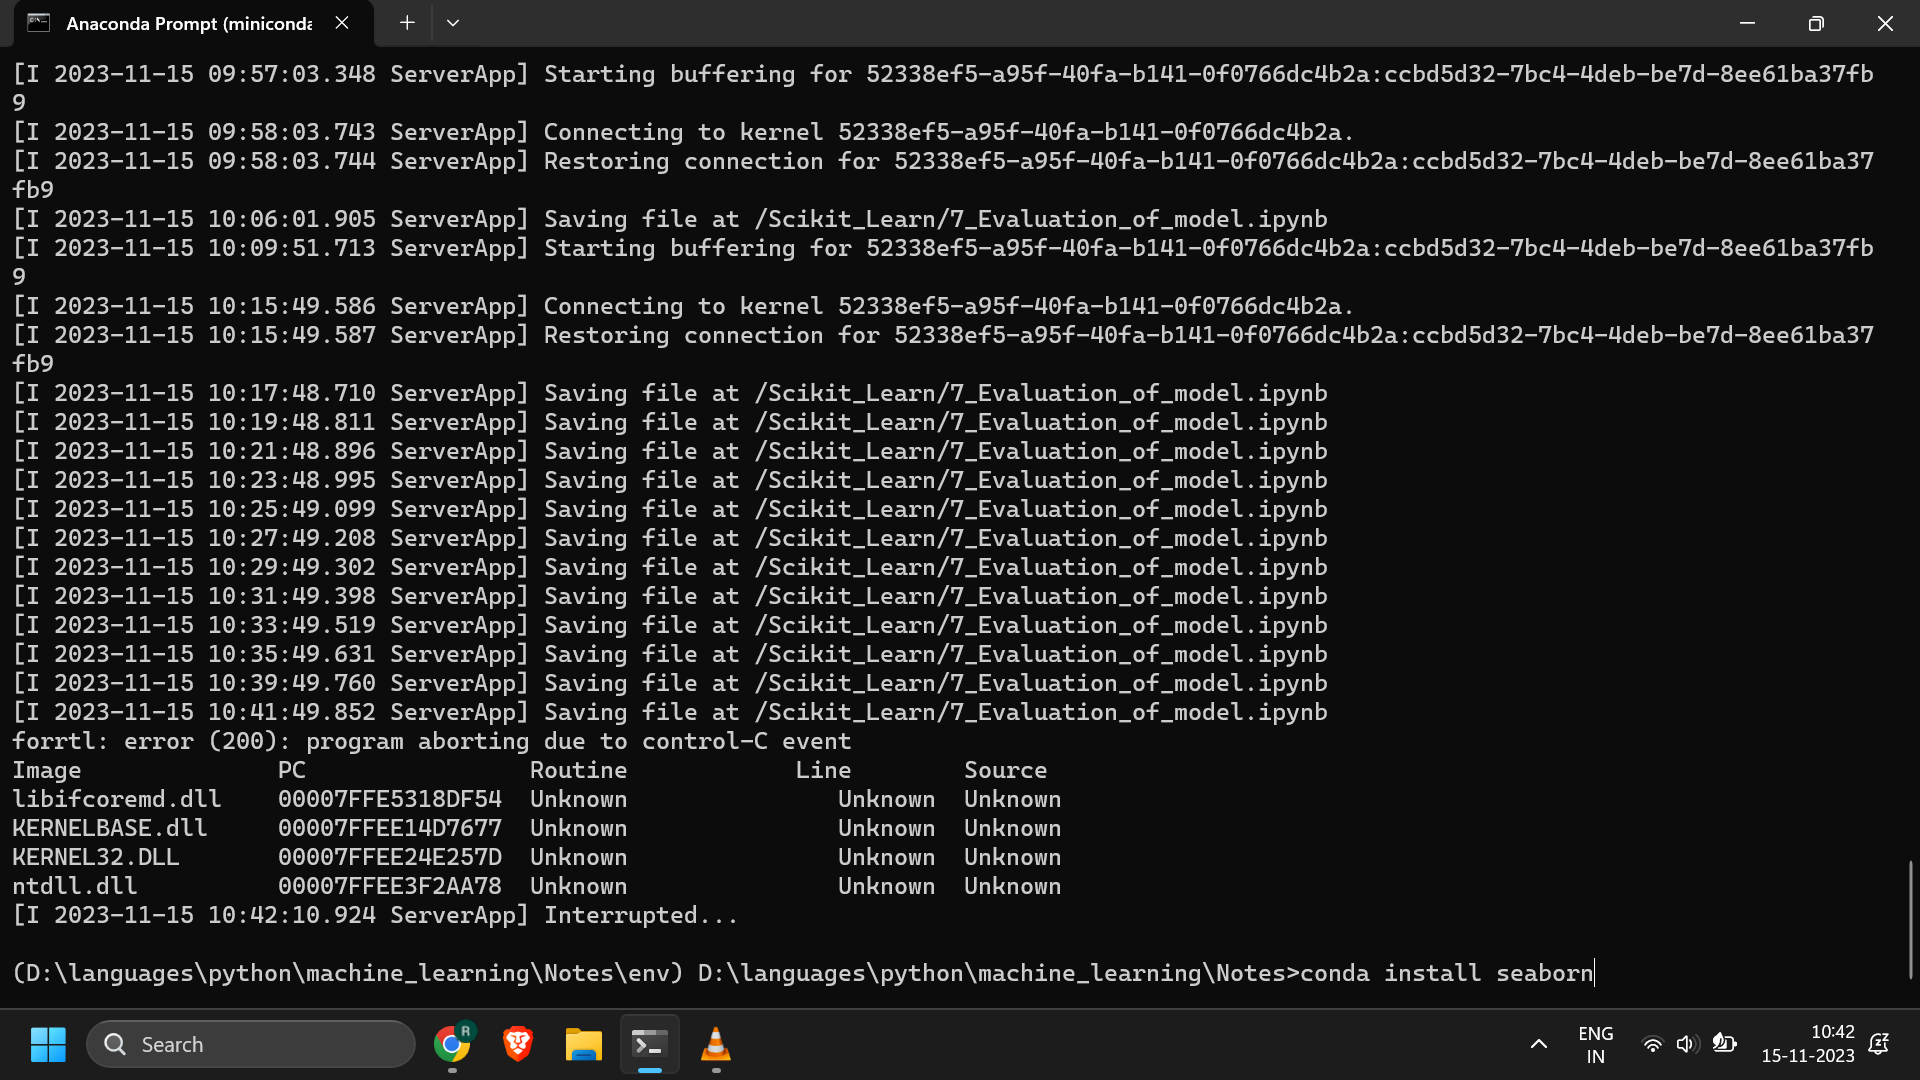


2. or using the jupyter notebook itself

In [23]:
import sys
# sys acts same terminal but with a !
!cd

D:\languages\python\machine_learning\Notes\Scikit_Learn


In [24]:
# now we want to install it inside notes, so we will go back
!cd..


In [25]:
!cd

D:\languages\python\machine_learning\Notes\Scikit_Learn


In [26]:
!cd ..

In [27]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 2038-B3F5

 Directory of D:\languages\python\machine_learning\Notes\Scikit_Learn

15-11-2023  11:55    <DIR>          .
25-10-2023  23:45    <DIR>          ..
14-11-2023  15:26    <DIR>          .ipynb_checkpoints
19-09-2023  11:21           452,309 1_Intro_to_SkLearn.ipynb
25-10-2023  21:41           119,197 2_Getting_the_DATA_Ready.ipynb
28-09-2023  11:27            20,862 3_working_with_missing_string_data.ipynb
18-10-2023  18:18            27,753 4_Convert_missing_values_sklearn.ipynb
13-11-2023  20:40         1,801,437 5_Chossing_right_model_for_ML.ipynb
14-11-2023  15:43           136,357 6_fit_model_and_make_predication.ipynb
15-11-2023  11:55         1,044,534 7_Evaluation_of_model.ipynb
18-09-2023  22:33           625,963 random_forest.pkl
               8 File(s)      4,228,412 bytes
               3 Dir(s)  119,022,120,960 bytes free


In [28]:
!cd ..

In [29]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 2038-B3F5

 Directory of D:\languages\python\machine_learning\Notes\Scikit_Learn

15-11-2023  11:55    <DIR>          .
25-10-2023  23:45    <DIR>          ..
14-11-2023  15:26    <DIR>          .ipynb_checkpoints
19-09-2023  11:21           452,309 1_Intro_to_SkLearn.ipynb
25-10-2023  21:41           119,197 2_Getting_the_DATA_Ready.ipynb
28-09-2023  11:27            20,862 3_working_with_missing_string_data.ipynb
18-10-2023  18:18            27,753 4_Convert_missing_values_sklearn.ipynb
13-11-2023  20:40         1,801,437 5_Chossing_right_model_for_ML.ipynb
14-11-2023  15:43           136,357 6_fit_model_and_make_predication.ipynb
15-11-2023  11:55         1,044,534 7_Evaluation_of_model.ipynb
18-09-2023  22:33           625,963 random_forest.pkl
               8 File(s)      4,228,412 bytes
               3 Dir(s)  119,022,120,960 bytes free


In [30]:
# !conda install --yes --prefix {sys.prefix} seaborn

In [31]:
# !conda install conda=23.10.0

In [32]:
import seaborn as sns

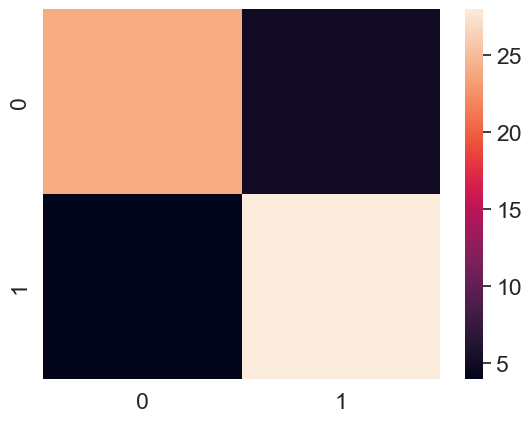

In [34]:
# creating a seaborn plot
sns.set(font_scale=1.5)

conf_mat =  confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

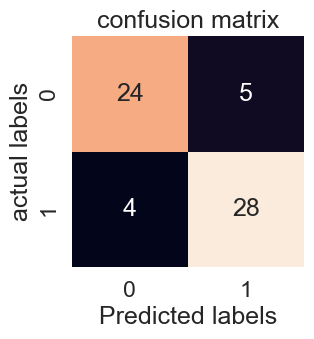

In [39]:
# fixing the confusion matrix

# adding a function

def plot_conf_mat(conf_mat):
    """
    plot confusion matrix using seaborn
    """
    fig,axis = plt.subplots(figsize=(3,3))
    axis = sns.heatmap(conf_mat,annot=True,cbar=False,)
    plt.xlabel("Predicted labels")
    plt.ylabel("actual labels")
    plt.title("confusion matrix")
    # plt.legend()
    plt.show()
 
plot_conf_mat(conf_mat)

# Classification Report: gives a complete report of how we have performed uptil now.


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



What is this Report all about?

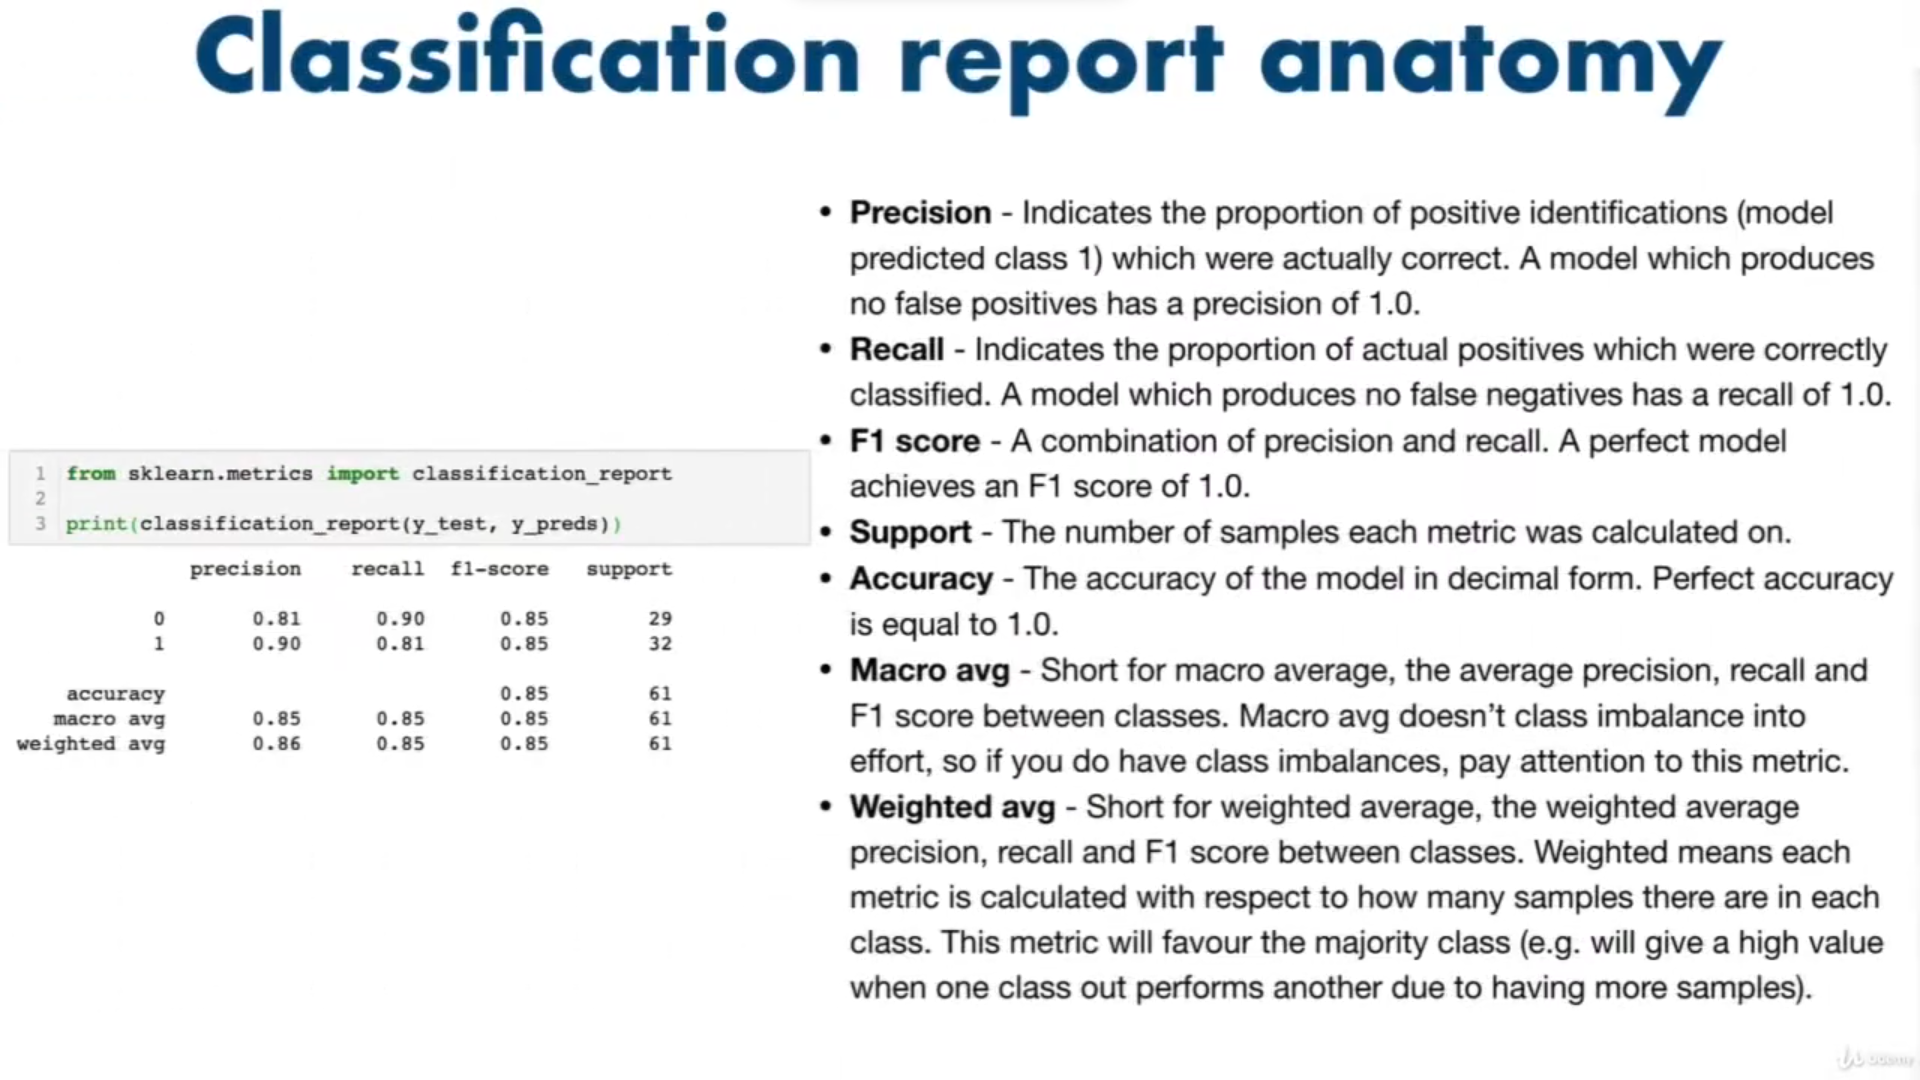

## In Summary

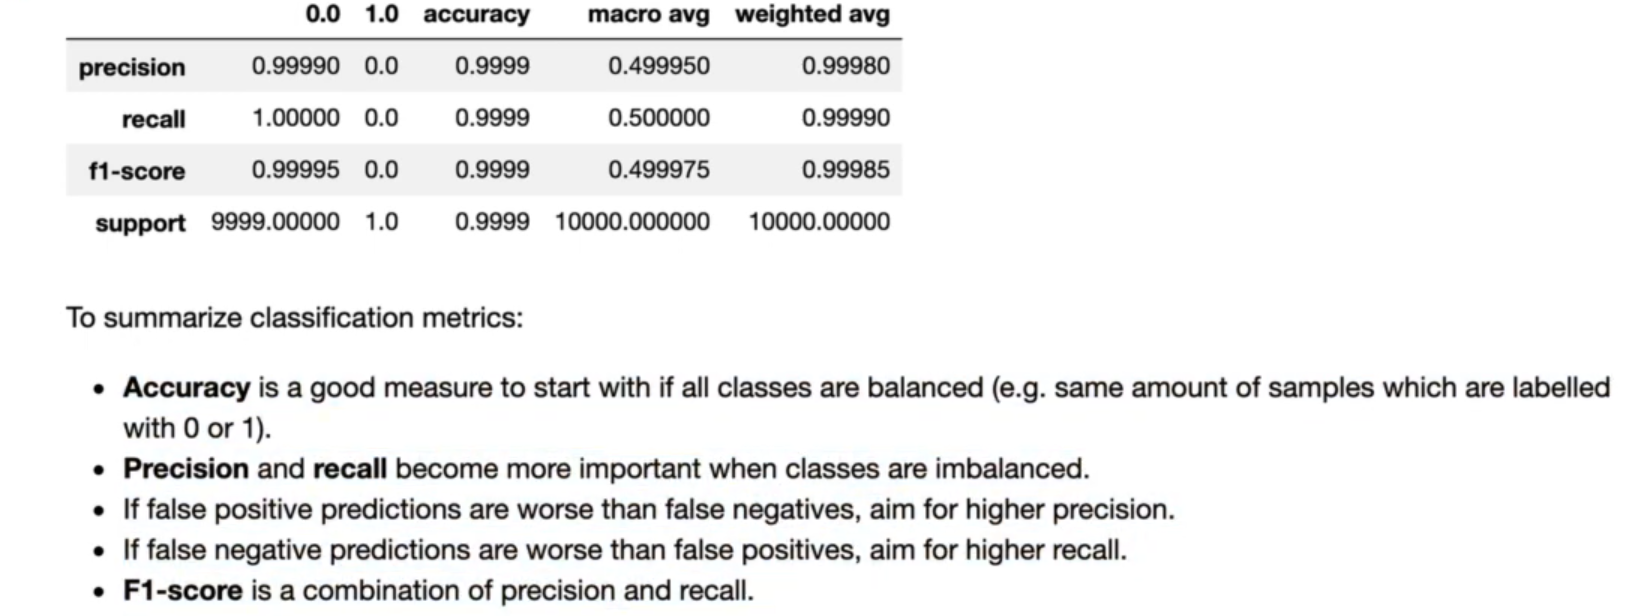